In [44]:
# imports
import os
import math
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from pylab import *
from IPython.display import display,HTML

# pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

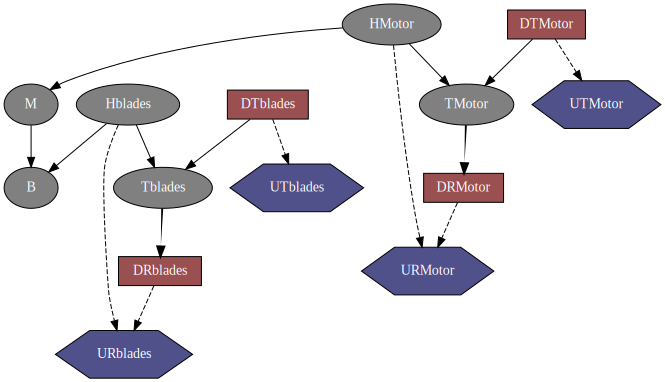

In [2]:
# creer influence diagram, laad BIFXML bestand en toon diagram
diag = gum.InfluenceDiagram()
diag.loadBIFXML('fan3.xml') # met voor 1 component de ID onderdelen voor vervangen en testen
gnb.showInfluenceDiagram(diag, size=80)

In [7]:
diagvars = diag.names()

In [26]:
ie = gum.ShaferShenoyLIMIDInference(diag) 
ie.setEvidence({'Hblades':1,'HMotor':0, 'DTMotor':0, 'DRMotor':1})
print(ie.hasEvidence('HMotor'))
ie.makeInference()
for i in diagvars:
    print(ie.posterior(i))

True

  TMotor                     |
notdone  |positive |negative |
---------|---------|---------|
 0.1000  | 0.8000  | 0.1000  |


  DTMotor          |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  HMotor           |
ok       |broken   |
---------|---------|
 1.0000  | 0.0000  |


  M                |
ok       |broken   |
---------|---------|
 0.8000  | 0.2000  |


  Hblades          |
ok       |broken   |
---------|---------|
 0.0000  | 1.0000  |


  Tblades                    |
notdone  |positive |negative |
---------|---------|---------|
 0.1000  | 0.1000  | 0.8000  |


      ||  Hblades          |
DRblad||ok       |broken   |
------||---------|---------|
yes   || 0.0000  | 1.0000  |
no    || 0.0000  | 0.0000  |


  DTblades         |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  B                |
ok       |broken   |
---------|---------|
 0.7800  | 0.2200  |


  DTMotor          |
yes      |no       |
---------|---------|
 1.0000  | 0.000

In [47]:
HMotor_posterior = ie.posterior('HMotor')

In [58]:
HMotor_posterior.get('ok')

TypeError: in method 'Potential_get', argument 2 of type 'gum::Instantiation const &'

In [46]:
df

HMotor  ok        1.0
        broken    0.0
dtype: float64

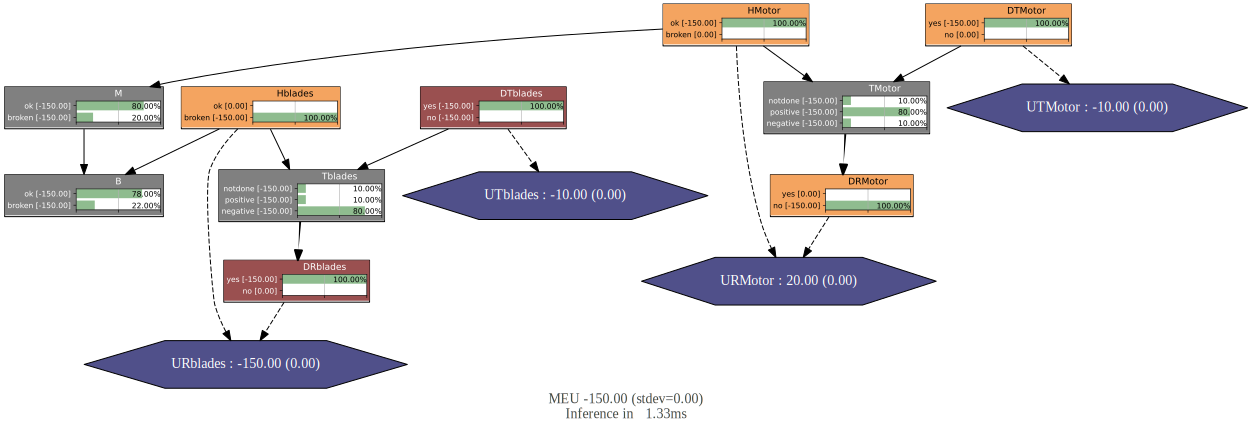

In [10]:
gnb.showInference(diag, evs={'Hblades':1,'HMotor':0, 'DTMotor':0, 'DRMotor':1}, size=40)

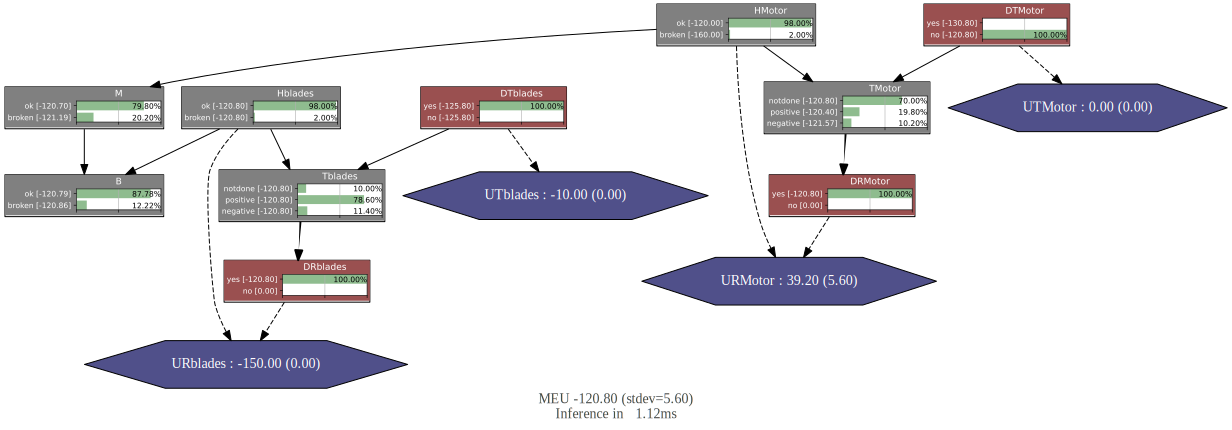

In [4]:
gnb.showInference(diag, evs={}, size=40)
